Ejercicio 1: Modelo de regresión lineal múltiple

In [1]:
#importamos las librerias que vamos a utilizar,descargandolas en la terminal con pip install..
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#punto 1 del ejercicio 1
datos1 = pd.read_csv('advertising.csv')
# print(datos1.head)
# print(datos1.columns)
# print(datos.keys)

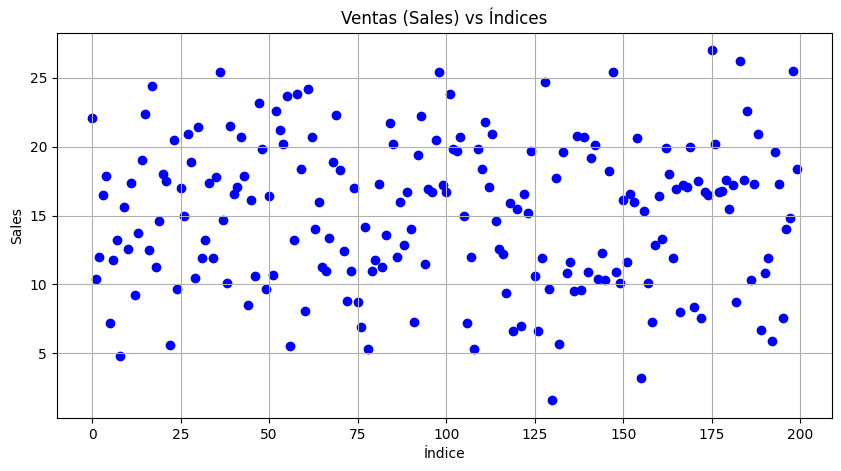

In [3]:
#punto 2 del ejercicio 1
plt.figure(figsize=(10,5))
plt.scatter(range(len(datos1)), datos1["Sales"], color='blue')
plt.title("Ventas (Sales) vs Índices")
plt.xlabel("Índice")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [4]:
#ejercicio 3, defino las variables dependientes e independientes X e Y, luego los divido en datos de prueba y entrenamiento
#tambien veo las correlaciones de las variable
y = datos1["Sales"] #variable a predecir
x = datos1[["TV","Radio","Newspaper"]] #valores de entrada
print("a partir de aca correlaciones:")
correlaciones= datos1[["TV", "Radio", "Newspaper","Sales"]].corr()
print(correlaciones)
#en este caso cambie el valor de random_state porque con 14 me daba un R2 mas chico que el que necesitaba
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=92)

a partir de aca correlaciones:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [5]:
#ejercicio 4, modelamos aplicando la regresion lineal, elijo datos de entrenamiento para realizar el modelo 
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
#reviso el intercepto y los coeficientes de mi funcion lineal
print("intercepto:", linear_regressor.intercept_)
print("Coeficientes:",linear_regressor.coef_)
#por último predigo la variable y con los datos de entrenamiento divididos
y_predicha_e  = linear_regressor.predict(X_test)

intercepto: 4.60447058677096
Coeficientes: [0.05437374 0.10531823 0.00134267]


In [7]:
#ejercicio 5, realizamos las pruebas y los graficos
import sklearn.metrics as sm 

In [8]:
print("Error absoluto medio =", round(sm.mean_absolute_error(y_test, y_predicha_e), 2)) 
print("Error cuadrático medio =", round(sm.mean_squared_error(y_test, y_predicha_e), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(y_test, y_predicha_e), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(y_test, y_predicha_e), 2)) 
print("Puntuación R2 =", round(sm.r2_score(y_test, y_predicha_e), 2))

Error absoluto medio = 1.04
Error cuadrático medio = 1.61
Error absoluto mediano = 0.92
Puntuación de varianza explicada = 0.95
Puntuación R2 = 0.95


In [9]:
#tambien cambie el valor del random_state, debido a que no me daba por debajo de 30%
error_porcentual = ((y_test.values - y_predicha_e) / y_test.values) * 100
if np.all(np.abs(error_porcentual) < 30):
    print("Todos los errores porcentuales son menores al 30%",error_porcentual)
else:
    print("Hay errores porcentuales mayores al 30%",error_porcentual)

Todos los errores porcentuales son menores al 30% [  2.89996854 -12.40752657   3.67489552  -5.53848716   4.87605903
  -3.18146559  23.57685193  -6.11453836  16.25698477  12.85143898
  -0.15156391  -2.75373527   6.54931612   1.21648363   4.61500283
   1.5885667    1.23146718   3.37660616   5.08608482 -26.13143118
   4.94109076   4.11850692   6.12016888  -8.06252502   3.71318572
  -2.76207461  -8.70393012  -4.49060306  -8.47095094 -11.66156381
  15.44769684   5.83678297 -10.68378939  -3.76783136 -10.30407718
  -2.29868104   9.63574655   7.90094717  -5.48552044   6.83481125]


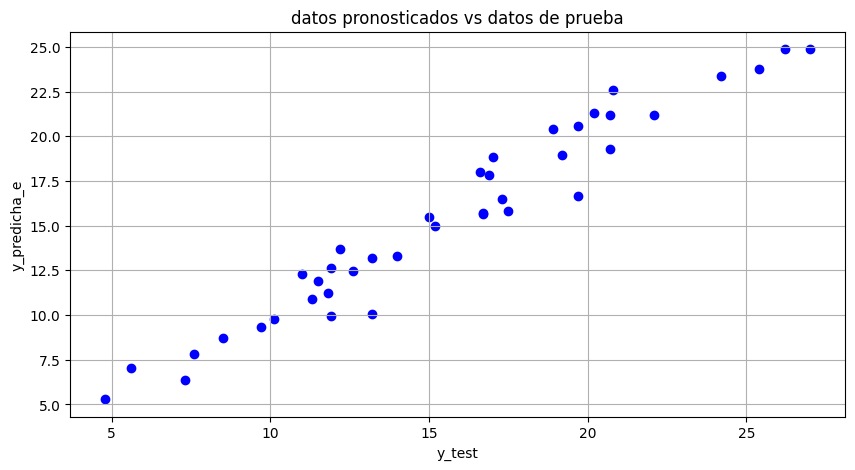

In [10]:
#Realizamos gráfico de los datos de prueba con lo obtenido en nuestro modelo
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_predicha_e, color='blue')
plt.title("datos pronosticados vs datos de prueba")
plt.xlabel("y_test")
plt.ylabel("y_predicha_e")
plt.grid(True)
plt.show()

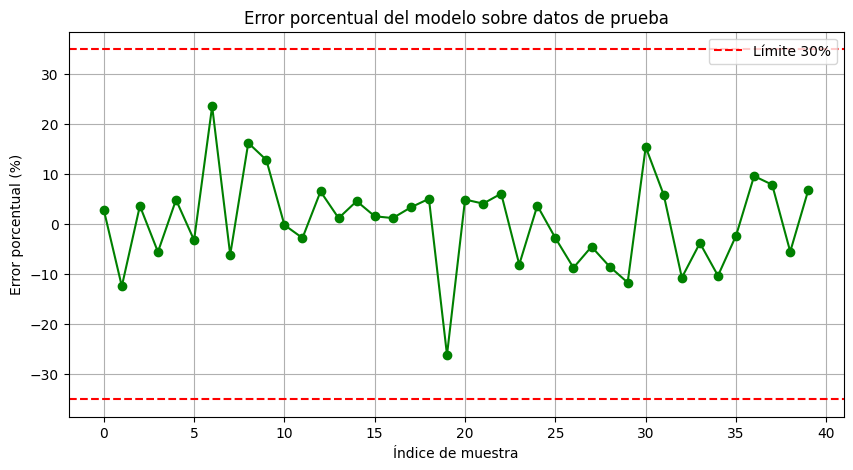

In [11]:
#Grafico de lineas para ver los errores porcentuales que no sean mayores al 30%
plt.figure(figsize=(10, 5))
plt.plot(range(len(error_porcentual)), error_porcentual, marker='o', linestyle='-', color='green')
plt.axhline(y=35, color='red', linestyle='--', label='Límite 30%')
plt.axhline(y=-35, color='red', linestyle='--')
plt.title("Error porcentual del modelo sobre datos de prueba")
plt.xlabel("Índice de muestra")
plt.ylabel("Error porcentual (%)")
plt.legend()
plt.grid(True)
plt.show()

En conclusión podemos ver que la funcion X_train,X_test,y_train,y_test nos ayuda mucho para dividir los datos pero depende del valor de random state que le des, va a realizar distintas separaciones aleatorias.
sin embargo podemos ver que el modelo sirve para predecir los datos de prueba, por lo tanto es un buen modelo debido a sus resultados